In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('2-multiplegradesdataset.csv')

In [9]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [10]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


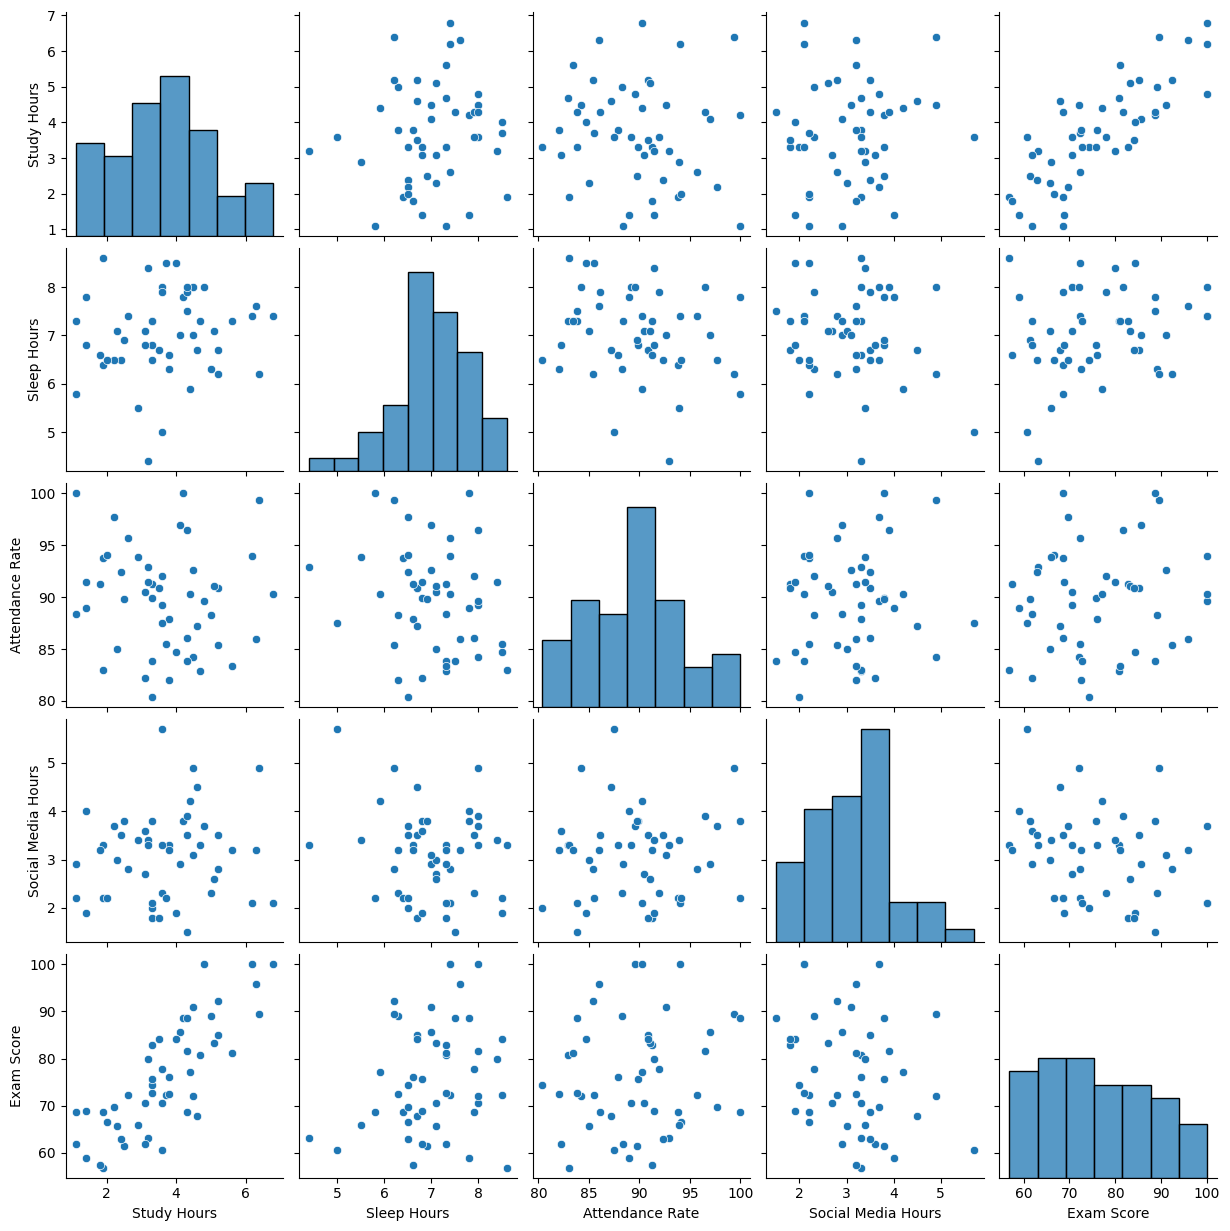

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


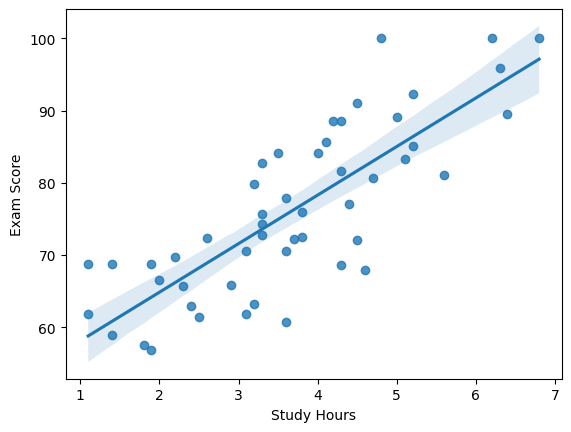

In [19]:
sns.regplot(x = df["Study Hours"], y = df["Exam Score"])
plt.show()

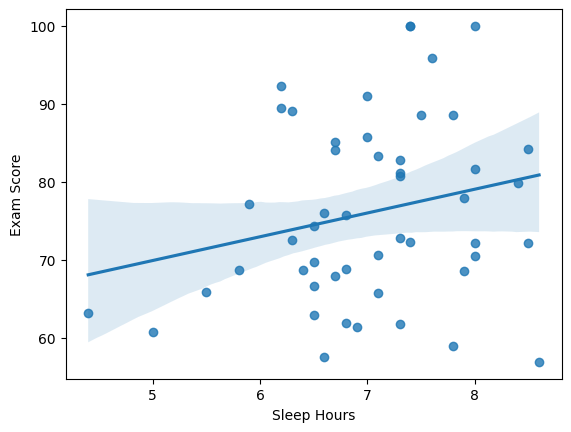

In [20]:
sns.regplot(x = df["Sleep Hours"], y = df["Exam Score"])
plt.show()

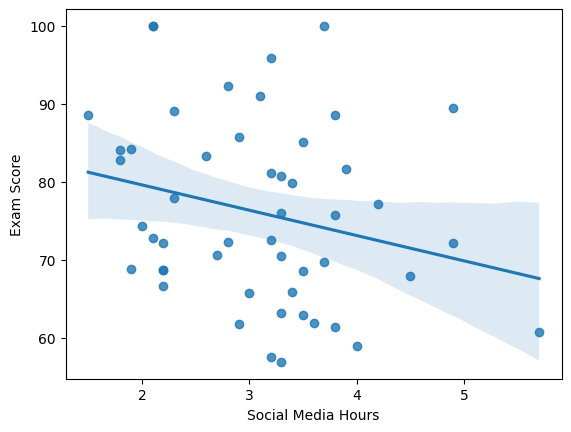

In [21]:
sns.regplot(x = df["Social Media Hours"], y = df["Exam Score"])
plt.show()

In [22]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [69]:
X_train.shape

(37, 4)

In [70]:
X_test.shape

(13, 4)

In [71]:
y_train.shape

(37,)

In [72]:
y_test.shape

(13,)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
regression = LinearRegression()

In [77]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [78]:
X.tail()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
45,2.9,5.5,93.9,3.4
46,3.3,7.3,83.8,2.1
47,5.6,7.3,83.4,3.2
48,4.5,7.0,92.6,3.1
49,1.4,6.8,91.5,1.9


In [79]:
y_pred=regression.predict(X_test)

In [80]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_absolute_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mae: ", mae)
print("rmse: ", rmse)

mse:  3.277026485962788
mae:  3.277026485962788
rmse:  1.8102559172566701


In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print("r2_score:", score)
adjusted_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("adjusted_r2_score:", adjusted_score)

r2_score: 0.915670734577271
adjusted_r2_score: 0.8735061018659065


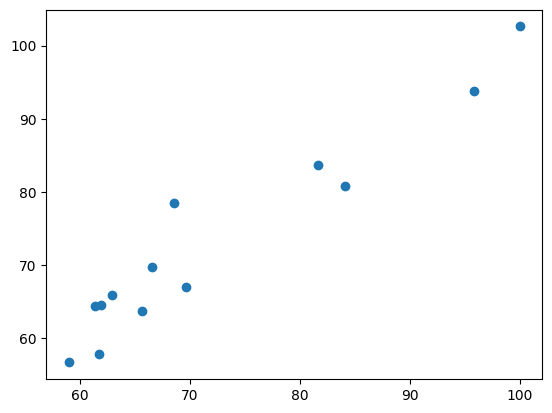

In [84]:
plt.scatter(y_test,y_pred)
plt.show()

In [86]:
residuals=y_test-y_pred
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


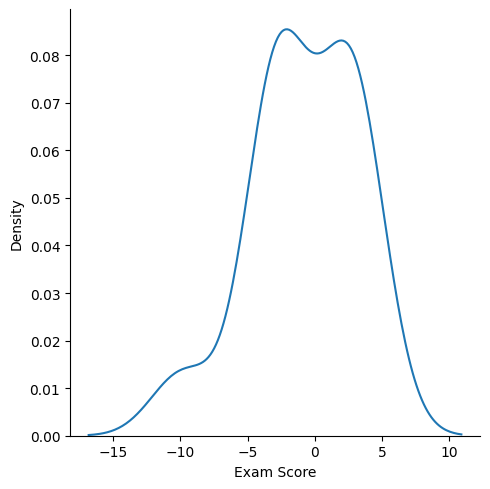

In [89]:
sns.displot(residuals,kind='kde')
plt.show()

In [91]:
print("coef:",regression.coef_)
print("intercept:",regression.intercept_)

coef: [ 9.28014703  1.78967062  3.24340001 -4.08127695]
intercept: 77.41081081081082


In [92]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [93]:
regression.predict(scaler.transform([[4.7,7.3,82.9,3.3]])) #First line in dataset. It sholud be 80.7 but result is 79.0

C:\Users\Business\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([79.01734025])

In [96]:
new_students = [
    [0, 8, 65, 3],
    [3, 2, 35, 7],
    [4, 5, 90, 7]
]

In [97]:
predicted_scores = regression.predict(scaler.transform(new_students))
print(predicted_scores)

[35.53206167  9.48720434 58.16182319]


C:\Users\Business\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
